## Tree-Based Regression Methods for 2D Linear Data

## Overview

The main purpose of this project is to use tree-based methods to solve regression problems. We will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 2D linear data set.  Since these models can be trained very quickly on the supplied data, we will first manually adjust hyperparameter values and observe their influence on the model's predictions.



We will perform several grid searches, and visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, we will compute the generalization error on the test set for the three models.

## Preliminaries

Let's import some common packages:

In [54]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = regressor.predict(x1.reshape(-1, 1)) 
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc='lower right', fontsize=10)
    plt.axis(axes)

# Import and Split Data

In [55]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('2DLinear.csv')

X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Plot Data


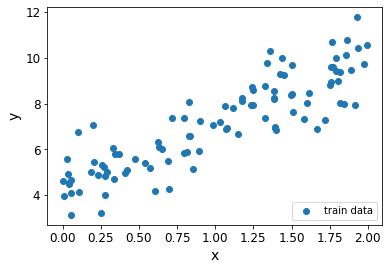

In [64]:
plt.scatter(X_train, y_train, label='train data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right', fontsize=10);

In [65]:
#calculating the endpoints of train data, to make a grid for later predictions and plotting
x_min = X_train.min().round(3)
y_min = y_train.min().round(3)

x_max = X_train.max().round(3)
y_max = y_train.max().round(3)

x_min, x_max, y_min, y_max

(0.0, 1.995, 3.141, 11.769)

In [66]:
axes = [0, 2, 0, 12]

# Explore 2D Linear Data: GradientBoostingRegressor

Now we fit a `GradientBoostingRegressor` model to this data. We manually assign values to the following hyperparameters. We "play around" by using different combinations of hyperparameter values to get a feel for how they affect the model's predictions.

 - `learning_rate = .1`
 - `max_depth = 2`
 - `n_estimators = 100`
 - `random_state = 42`

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gboost_reg = GradientBoostingRegressor(learning_rate=.1, 
                                       max_depth=2, 
                                       n_estimators=100, 
                                       random_state=42)
gboost_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, random_state=42)

### Plot Model Predictions for Training Set

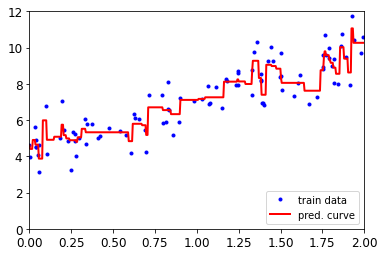

In [68]:
plot_predictions(gboost_reg, X_train, y_train, axes=axes, label='pred. curve', data_label='train data')

# Explore 2D Linear Data: RandomForestRegressor

We fit a `RandomForestRegressor` model to this data.  We manually assign values to the following hyperparameters.  We "play around" by using different combinations of hyperparameter values to get a feel for how they affect the model's predictions. 

 - `min_samples_split = 4`
 - `max_depth = 32`
 - `n_estimators = 1000`
 - `random_state = 42`

In [69]:
from sklearn.ensemble import RandomForestRegressor

randForest_reg = RandomForestRegressor(n_estimators=1000, 
                                       min_samples_split=4,
                                       max_depth=32,
                                       random_state=42)

randForest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=32, min_samples_split=4, n_estimators=1000,
                      random_state=42)

### Plot Model Predictions for Training Set

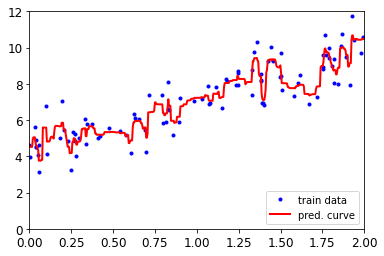

In [70]:
plot_predictions(randForest_reg, X_train, y_train, axes=axes, label='pred. curve', data_label='train data')

# Explore 2D Linear Data: DecisionTreeRegressor

We fit a `DecisionTreeRegressor` model to this data.  We manually assign values to the following hyperparameters. We "play around" by using different combinations of hyperparameter values to  get a feel for how they affect the model's predictions.

 - `splitter = 'best'`
 - `max_depth = 16`
 - `min_samples_split = 12`
 - `random_state = 42`

In [71]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor(splitter="best",
                                  max_depth=16,
                                  min_samples_split=12)

dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16, min_samples_split=12)

### Plot Model Predictions for Training Set

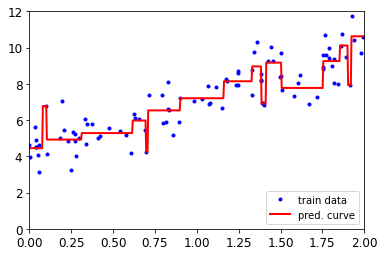

In [72]:
plot_predictions(dtree_reg, X_train, y_train, axes=axes, label='pred. curve', data_label='train data')

## Perform Grid Searches

We now perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.

We first perform a course-grained grid search, with a very broad range of values first. Then, we perform a second grid search using a tighter range of values centered on those identified in the first grid search. We may have to use another round of grid searching too.

   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`  

## Perform Individual Model Grid Searches

In this section we perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [73]:
from sklearn.model_selection import GridSearchCV

# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

gboost_coarse_grid = {'max_depth':[2, 4, 8, 16, 32],
                      'n_estimators':[10, 100, 250, 500, 750, 1000],
                      'learning_rate':[.01, .05, .1, .5, 1]}

gboost_coarse_reg = GridSearchCV(GradientBoostingRegressor(random_state=42), gboost_coarse_grid, verbose=1, cv=3)
gboost_coarse_reg.fit(X_train, y_train)

print("The best parameters are: ", gboost_coarse_reg.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
The best parameters are:  {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


In [75]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

gboost_fine_grid = {'max_depth':[2, 3],
                    'n_estimators':[50, 100, 150, 200],
                    'learning_rate':[.2, .25, .4, .5, .6, .75]}

gboost_fine_reg = GridSearchCV(GradientBoostingRegressor(random_state=42), gboost_fine_grid, verbose=1, cv=3)
gboost_fine_reg.fit(X_train, y_train)

print("The best parameters are: ", gboost_fine_reg.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
The best parameters are:  {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}


In [76]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

gboost_final_grid = {'max_depth':[2],
                    'n_estimators':list(range(25, 80, 5)),
                    'learning_rate':[.16, .18, .2, .22, .24]}

gboost_final_reg = GridSearchCV(GradientBoostingRegressor(random_state=42), gboost_final_grid, verbose=1, cv=3)
gboost_final_reg.fit(X_train, y_train)

print("The best parameters are: ", gboost_final_reg.best_params_)

Fitting 3 folds for each of 55 candidates, totalling 165 fits
The best parameters are:  {'learning_rate': 0.22, 'max_depth': 2, 'n_estimators': 25}


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = .22`
- `max_depth = 2`
- `n_estimators = 25`

In [77]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----
randForest_coarse_grid = {'max_depth':[2, 4, 8, 16, 32],
                          'n_estimators':[10, 100, 250, 500, 750, 1000],
                          'min_samples_split':[4, 8, 12, 16, 20]}

randForest_coarse_reg = GridSearchCV(RandomForestRegressor(random_state=42), 
                                      randForest_coarse_grid, verbose=1, cv=3)
randForest_coarse_reg.fit(X_train, y_train)

print("The best parameters are: ", randForest_coarse_reg.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
The best parameters are:  {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 1000}


In [78]:
# -----
# Refined RandomForestRegressor GridSearch
# -----
randForest_fine_grid = {'max_depth':[6, 8, 10, 12, 14],
                        'n_estimators':[800, 1000, 1250, 1500],
                        'min_samples_split':[6, 7, 8, 9, 10, 11]}

randForest_fine_reg = GridSearchCV(RandomForestRegressor(random_state=42), randForest_fine_grid, verbose=1, cv=3)
randForest_fine_reg.fit(X_train, y_train)

print("The best parameters are: ", randForest_fine_reg.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
The best parameters are:  {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 1250}


In [79]:
# -----
# Final RandomForestRegressor GridSearch
# -----
randForest_final_grid = {'max_depth':[7, 8, 9],
                         'n_estimators':list(range(1150, 1450, 50)),
                         'min_samples_split':[8]}

randForest_final_reg = GridSearchCV(RandomForestRegressor(random_state=42), randForest_final_grid, verbose=1, cv=3)
randForest_final_reg.fit(X_train, y_train)

print("The best parameters are: ", randForest_final_reg.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
The best parameters are:  {'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 1250}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = 7`
- `n_estimators = 1250`
- `min_samples_split = 8`

In [80]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----
dtree_coarse_grid = {'splitter':['best', 'random'],
                     'max_depth':[2, 4, 8, 16, 32],
                     'min_samples_split':[4, 8, 12, 16, 20]}

dtree_coarse_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), dtree_coarse_grid, verbose=1, cv=3)
dtree_coarse_reg.fit(X_train, y_train)

print("The best parameters are: ", dtree_coarse_reg.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
The best parameters are:  {'max_depth': 4, 'min_samples_split': 16, 'splitter': 'best'}


In [81]:
# -----
# Refined DecisionTreeRegressor GridSearch
# -----
dtree_fine_grid = {'splitter':['best'],
                   'max_depth':[3, 4, 5, 6, 7],
                   'min_samples_split':[13, 14, 15, 16, 17, 18]}

dtree_fine_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), dtree_fine_grid, verbose=1, cv=3)
dtree_fine_reg.fit(X_train, y_train)

print("The best parameters are: ", dtree_fine_reg.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 13, 'splitter': 'best'}


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = 'best'`
- `max_depth = 5`
- `min_samples_split = 13`

# Visualize Optimal Model Predictions

In the previous section we performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, we use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, we visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.

### Create Optimal GradientBoostingRegressor Model

In [82]:
gboost_opt = GradientBoostingRegressor(learning_rate=.22, max_depth=2, n_estimators=25, random_state=42)
gboost_opt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.22, max_depth=2, n_estimators=25,
                          random_state=42)

### Plot Model Predictions for Training Set

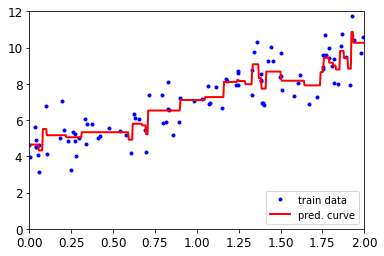

In [83]:
plot_predictions(gboost_opt, X_train, y_train, axes=axes, label='pred. curve', data_label='train data')

### Create Optimal RandomForestRegressor Model

In [84]:
randForest_opt = RandomForestRegressor(n_estimators=1250, max_depth=7, min_samples_split=8, random_state=42)
randForest_opt.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=8, n_estimators=1250,
                      random_state=42)

### Plot Model Predictions for Training Set

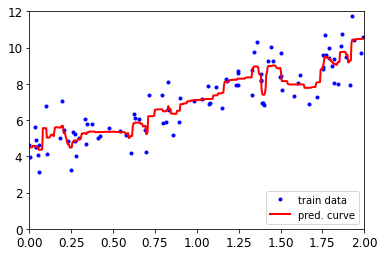

In [85]:
plot_predictions(randForest_opt, X_train, y_train, axes=axes, label='pred. curve', data_label='train data')

### Create Optimal DecisionTreeRegressor Model

In [86]:
dtree_opt = DecisionTreeRegressor(splitter='best', max_depth=5, min_samples_split=13, random_state=42)
dtree_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=13, random_state=42)

### Plot Model Predictions for Training Set

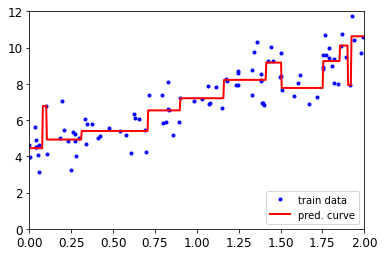

In [87]:
plot_predictions(dtree_opt, X_train, y_train, axes=axes, label='pred. curve', data_label='train data')

# Compute Generalization Error

We compute the generalization error for each of the optimal models computed above, and we use MSE as the generalization error metric.

In [88]:
from sklearn.metrics import mean_squared_error 

#Gradient Boost prediction
y_pred_gboost = gboost_opt.predict(X_test)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
print("MSE for Gradient Boost Regressor:", round(mse_gboost, 4))

#Random Forest prediction
y_pred_randForest = randForest_opt.predict(X_test)
mse_randForest = mean_squared_error(y_test, y_pred_randForest)
print("MSE for Random Forest Regressor:", round(mse_randForest, 4))

#Decision Tree prediction
y_pred_dtree = dtree_opt.predict(X_test)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
print("MSE for Random Forest Regressor:", round(mse_dtree, 4))

MSE for Gradient Boost Regressor: 1.4079
MSE for Random Forest Regressor: 1.2747
MSE for Random Forest Regressor: 1.3041


# Analysis

### Gradient Boost Regressor

We first plot the prediction curve for the test set.

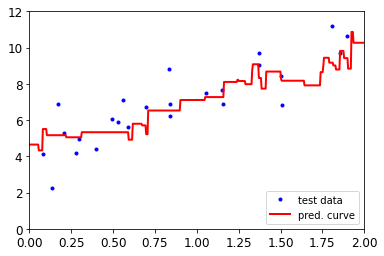

In [89]:
plot_predictions(gboost_opt, X_test, y_test, axes=axes, label='pred. curve', data_label='test data')

We see that Gradient Boost Regressor fits the prediction curve as a stepwise function. It tries to follow an increasing trend rather fit trough every point. It also mostly ignores the outliers while trying to get closer to the cluster of the points.

### Random Forest Regressor

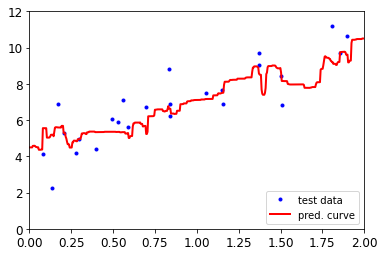

In [90]:
plot_predictions(randForest_opt, X_test, y_test, axes=axes, label='pred. curve', data_label='test data')

Random Forest Reg. is much more fine-grained than the G-Boost Reg. This is due to a large number of estimators, which try to split the 2D plane into smallest possible but meaningful regions, through which will interpolate the prediction curve. This is why there is no overfit, even though the plot is quite fine-grained, since the algorithm primarily focus on covering and splitting the areas of clustered points, rather than trying to reach the outliers. 

### Decision Tree Regressor

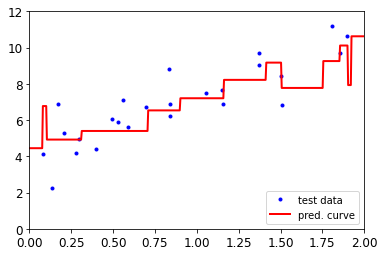

In [91]:
plot_predictions(dtree_opt, X_test, y_test, axes=axes, label='pred. curve', data_label='test data')

Decision Tree behaves similarly to G-Boost Reg. However, it is even more coarser than the G-Boost (since the 'min_samples_split' hyperparameter is high). Its prediction curve is stepwise monothone, so its primary focus is to follow the growing trend, and not trying to interpolate trough the clusters as well. Although this avoids overfit, it can be prone to underfitting, as some points which are not outliers still remain a bit far from the prediction curve.

# Final Model Selection and Justification

### And the winner is...

We select Random Forest Regressor as the Final Model. It might look like an overkill, considering the large number of estimator it requires, and the similarly good performance of Decision Tree, which employs much less resources, we still decide to go with the Random Forest, as we have machines poweful enough to run the training and inference quickly. (Although in case we are restricted to more modest computational resources, we would advise going with the Decision Tree). Moreover, seeing how the prediction line manages to capture the underlying distribution in both the train and test sets, without overfitting, and considering the best MSE score among all three algorithms, we give the final vote to the Random Forest Regressor with the following hyperparameters:

- `max_depth = 7`
- `n_estimators = 1250`
- `min_samples_split = 8`